In [53]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from skimage import data
from skimage import color
from skimage.util.shape import view_as_windows
from skimage.util import montage as montage2d
from skimage.io import imread
from skimage.transform import resize
from skimage.util import view_as_blocks
from scipy import ndimage as ndi
from random import sample
import matplotlib.pyplot as plt
import seaborn as sns

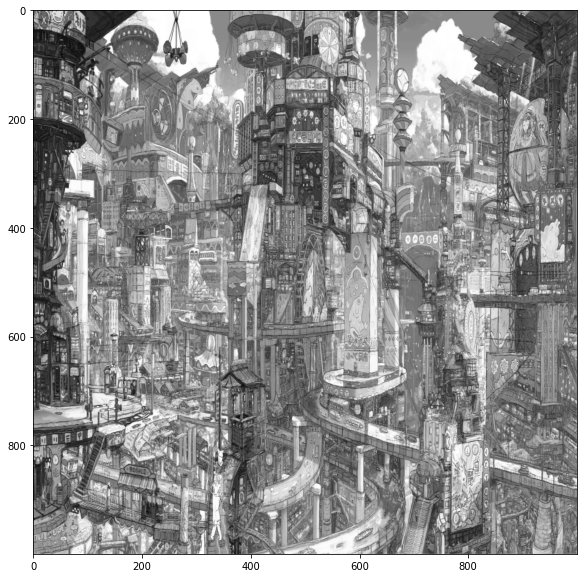

In [54]:
puzzle = imread("town.jpg",as_gray = True)
puzzle = resize(puzzle,(1000,1000))
puzzle.shape
fig = plt.figure(figsize=(10,10))
plt.imshow(puzzle,cmap = plt.cm.gray)

In [55]:
puzzle_shape = (200,200)
puzzle_blocks_orig = view_as_blocks(puzzle, block_shape = puzzle_shape)
puzzle_blocks_orig.shape
#fig = plt.figure(figsize=(20,20))
#plt.imshow(puzzle_blocks_orig,cmap = plt.cm.gray)

(5, 5, 200, 200)

In [56]:
puzzle_blocks = puzzle_blocks_orig
puzzle_blocks = puzzle_blocks.reshape((-1,)+puzzle_shape)
puzzle_blocks.shape

(25, 200, 200)

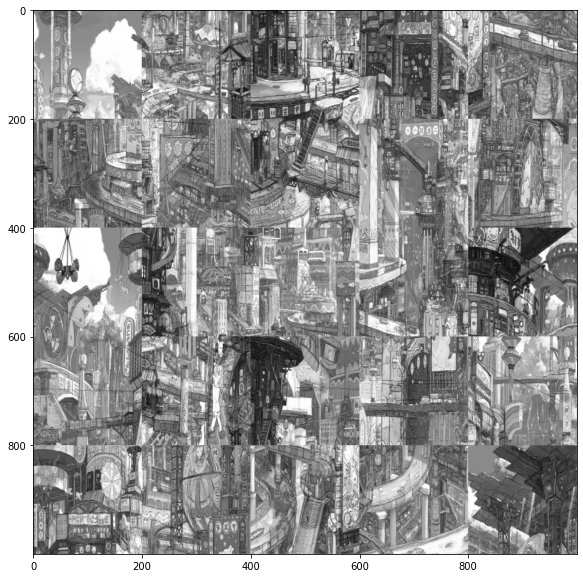

In [57]:
np.random.shuffle(puzzle_blocks)
puzzle_montage = montage2d(puzzle_blocks)
fig = plt.figure(figsize=(10,10))
plt.imshow(puzzle_montage,cmap = plt.cm.gray)

In [58]:
from sklearn.metrics.pairwise import pairwise_distances
from skimage.util import view_as_blocks
from sklearn.feature_extraction.image import extract_patches_2d

In [59]:
bw = 1
orientations = ['bottom','top','left','right']
top_ = lambda X,bw: X[0:bw,:].reshape(1,-1)
right_ = lambda X,bw: X[:,0:bw].reshape(1,-1)
bottom_ = lambda X,bw: X[(-1-bw):-1,:].reshape(1,-1)
left_ = lambda X,bw: X[:,(-1-bw):-1].reshape(1,-1)

In [60]:
def edge_distances(A,B):
  bw=1
  d1 = pairwise_distances(top_(A,bw),bottom_(B,bw),metric = "cosine")[0][0]
  d2 = pairwise_distances(bottom_(A,bw),top_(B,bw),metric = "cosine")[0][0]
  d3 = pairwise_distances(right_(A,bw),left_(B,bw),metric = "cosine")[0][0]
  d4 = pairwise_distances(left_(A,bw),right_(B,bw),metric = "cosine")[0][0]
  return [d1,d2,d3,d4]

In [61]:
def piece_dissimilarity(A,B):
  ed = edge_distances(A,B)
  return np.min(ed),np.argmin(ed)

In [62]:
n = puzzle_blocks.shape[0]
Ke = np.zeros((n,n))
KeO = np.zeros((n,n))
#print(KeO)
for i in np.arange(n):
  for j in np.arange(n):
    Ke[i,j],KeO[i,j] = piece_dissimilarity(puzzle_blocks[i],puzzle_blocks[j])
print(KeO)
    

[[0. 1. 2. 2. 2. 0. 2. 0. 3. 2. 0. 3. 2. 0. 0. 3. 0. 2. 2. 1. 2. 2. 2. 2.
  3.]
 [0. 0. 2. 2. 0. 3. 0. 0. 2. 2. 0. 2. 0. 0. 0. 0. 1. 0. 2. 0. 1. 2. 3. 0.
  2.]
 [3. 3. 2. 3. 0. 1. 3. 1. 3. 2. 2. 0. 3. 2. 0. 2. 2. 0. 3. 3. 3. 2. 3. 2.
  2.]
 [3. 3. 2. 2. 1. 2. 2. 2. 2. 1. 1. 2. 1. 1. 2. 2. 2. 3. 2. 3. 0. 2. 3. 2.
  2.]
 [3. 1. 1. 0. 0. 3. 0. 0. 0. 3. 0. 1. 2. 3. 3. 1. 0. 1. 0. 3. 1. 3. 2. 1.
  0.]
 [1. 2. 0. 3. 2. 2. 2. 0. 3. 0. 1. 1. 2. 3. 0. 1. 1. 2. 2. 0. 1. 0. 3. 1.
  1.]
 [3. 1. 2. 3. 1. 3. 2. 2. 0. 3. 1. 3. 0. 2. 2. 3. 1. 2. 0. 3. 1. 2. 3. 3.
  1.]
 [1. 1. 0. 3. 1. 1. 3. 2. 3. 2. 3. 1. 1. 2. 2. 1. 3. 1. 3. 3. 1. 2. 3. 1.
  1.]
 [2. 3. 2. 3. 1. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 3. 0. 1. 2. 3. 2.
  2.]
 [3. 3. 3. 0. 2. 1. 2. 3. 3. 2. 3. 3. 2. 3. 3. 3. 2. 3. 3. 3. 3. 3. 3. 3.
  3.]
 [1. 1. 3. 0. 1. 0. 0. 2. 3. 2. 0. 1. 0. 2. 2. 1. 0. 3. 2. 0. 3. 2. 3. 1.
  0.]
 [2. 3. 1. 3. 0. 0. 2. 0. 3. 2. 0. 0. 3. 0. 0. 3. 0. 0. 3. 3. 3. 1. 3. 0.
  3.]
 [3. 1. 2. 0. 3. 3. 1. 0. 3. 3. 1. 2. 0.

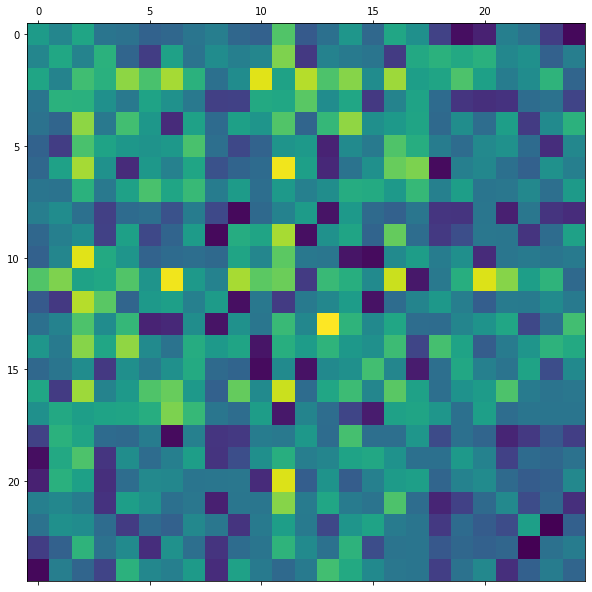

In [63]:
plt.figure(figsize=(10,10))
plt.matshow(Ke, fignum = 1)

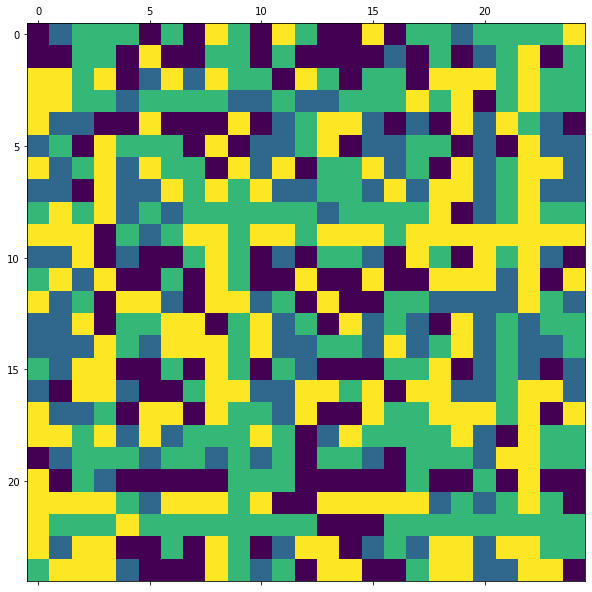

In [64]:
plt.figure(figsize=(10,10))
plt.matshow(KeO, fignum=1)

Genetic Algorithm

Random individual

In [65]:
def individual(length):
  xi = np.arange(length)
  np.random.shuffle(xi)
  return xi.tolist()

individual(25)

[15,
 8,
 6,
 9,
 16,
 3,
 22,
 21,
 4,
 23,
 11,
 20,
 12,
 17,
 5,
 24,
 10,
 13,
 0,
 1,
 7,
 19,
 14,
 18,
 2]

Defining Fitness

In [66]:
def indv_to_edgelist(indiv):
  n=int(np.sqrt(len(indiv)))
  A=np.array(indiv).reshape(n,n)
  obs_edges = set()
  for i in np.arange(n):
    for j in np.arange(n):
      if j+1<n:
        ii = A[i,j]
        jj = A[i,j+1]
        obs_edges.add((ii,jj,KeO[ii,jj]))
      if i+1<n:
        ii = A[i,j]
        jj = A[i+1,j]
        obs_edges.add((ii,jj,KeO[ii,jj]))
  return obs_edges

def fitness(indiv, target = 1):
    elist = indv_to_edgelist(indiv)
    return (np.sum([Ke[e[0],e[1]] for e in elist]))

Initialization

In [67]:
from past.builtins import xrange
from functools import reduce
from operator import add
def population(count, length):
  return [ individual(length) for x in xrange(count)]

def grade(pop, target):
  'Find average fitness for a population'
  summed = reduce(add, (fitness(x,target) for x in pop))
  return summed / (len(pop)*1.0)

Crossover

In [68]:
def edge_pairs(individual):
  n = int(np.sqrt(len(individual)))
  m = n
  A = np.array(individual).reshape(n,n)
  obs_edges = set()
  for i in np.arange(n):
    for j in np.arange(m):
      if j+1 < m:
        ii = A[i,j]
        jj = A[i,j+1]
        if i < j:
          obs = (ii,jj,3.0,((i,j),(i,j+1)))
        else:
          obs = (ii,jj,2.0,((i,j),(i,j+1)))
        obs_edges.add(obs)
      if i+1 < n:
        ii = A[i,j]
        jj = A[i+1,j]
        if i < j:
          obs = (ii,jj,0.0,((i,j),(i+1,j)))
        else:
          obs = (ii,jj,1.0,((i,j),(i+1,j)))
        obs_edges.add(obs)
  return list(obs_edges)

In [69]:
def update_boundary(child):
  n = int(np.sqrt(child.shape[0]))
  Cmat = child.reshape(n,n)
  candidate_pairs = edge_pairs(child)
  candidate_pairs = [c for c in candidate_pairs if (c[0] == -1) != (c[1] == -1)]

  results = []
  for cix in candidate_pairs:
    a = cix[0]
    b = cix[1]
    o = cix[2]
    ref = np.max([a,b])
    n_neighbours = np.argsort(Ke[ref,:])
    for nn in n_neighbours:
      if ((nn in child) == False) & (KeO[ref,nn]==o):
        results.append((ref, nn, o, Ke[ref,nn], cix[3], (a,b)))
        break
  if len(results) > 0:
    result = sample(results,1)[0]
    if result[5][0] == -1:
      rep_value = result[1]
      xi = int(result[4][0][0])
      yi = int(result[4][0][1])
    else:
      rep_value = result[1]
      xi = int(result[4][1][0])
      yi = int(result[4][1][1])

    Cmat[xi,yi] = rep_value
    child = Cmat.reshape(1,-1)[0]
    
  else:
    #idx_=np.arange(child.shape[0])
    #missing_pieces = idx_[np.isin(idx_,child)==False]
    missing_pieces = []
    for i in range(25):
      chi = 0
      for j in range(25):
        if child[j]==i:
          chi = 1
      if chi == 0:
        missing_pieces.append(i)
    np.random.shuffle(missing_pieces)
    
    iter = 0
    for i in np.arange(child.shape[0]):
      if child[i] == -1:
        child[i] = missing_pieces[iter]
        iter+=1

  return child
  

In [70]:
def crossover_operator(male,female):
  child = np.zeros(male.shape[0]).astype(int)
  child[:] = -1

  match_indices = np.where(male == female)
  child[match_indices] = female[match_indices]

  if child.sum() == -1*child.shape[0]:
    idx = np.random.choice(np.arange(child.shape[0]))
    child[idx] = male[idx]
  while(child.sum()<np.arange(child.shape[0]).sum()):
    child = update_boundary(child)

  return child  

  

Evolution cycle

In [71]:
from random import randint, random, sample
from operator import add

def evolve(pop, target, retain = 0.2, random_select = 0.05, mutate = 0.05):
  graded = [(fitness(x,target),x) for x in pop]
  graded = [ x[1] for x in sorted(graded)]
  retain_length = int(len(graded)*retain)
  parents = graded[:retain_length]

  for individual in graded[retain_length:]:
    if random_select > random():
      parents.append(individual)

  for individual in parents:
    if mutate> random():
      individual = np.roll(individual,1)

  parents_length = len(parents)
  desired_length = len(pop) - parents_length
  children = []
  while len(children) < desired_length:
    male = randint(0, parents_length-1)
    female = randint(0, parents_length-1)
    if male!=female:
      male = parents[male]
      female = parents[female]
      child = crossover_operator(np.array(male),np.array(female))
      child = child.tolist()
      children.append(child)

  parents.extend(children)
  return parents     

Demonstration

In [72]:
n = np.sqrt(Ke.shape[0])
m = np.sqrt(Ke.shape[0])

target = 1.0
p_count = 1000
p = population(p_count, Ke.shape[0])
fitness_history = [grade(p, target),]

iteration_img = []
for i in xrange(100):
  p = evolve(p, target, retain = 0.4, random_select = 0.05, mutate = 0.01)

  fitness_iter = grade(p,target)
  fitness_history.append(fitness_iter)

  opt_index = idx = np.argmin([fitness(pi,0) for pi in p])
  iter_attempt = montage2d(puzzle_blocks[p[opt_index],:,:])
  iteration_img.append(iter_attempt)
  
  print(fitness_iter)


  

1.4913338380136099
1.3972206027843619
1.370696423204972
1.3553112451821008
1.3452150214011167
1.344111886466299
1.3407461170099353
1.3377565102704978
1.3308077661345872
1.3289108444487334
1.3274744556296314
1.3236517097875609
1.3228742088533698
1.32243760445579
1.3134112919187357
1.3196982808840039
1.316320065443869
1.3089293664593666
1.308430364400167
1.3063047264623024
1.3076029754677123
1.3028823905939462
1.303826303425234
1.3072850730432781
1.3064532327557303
1.3009208723390653
1.2983424969424284
1.300020007851319
1.3009955972296081
1.2998358562247363
1.2949878935030776
1.3022294274441575
1.2975526131867712
1.2978385059700162
1.2900716067829143
1.2897634148540558
1.291997739632908
1.289532237536741
1.2926072048121025
1.2874677153712613
1.2855256303261235
1.2873161487974105
1.283156143075521
1.2819906280323294
1.2769860008515683
1.2761446524481865
1.281843793163663
1.2759792850475768
1.2724400938818403
1.2701643249362424
1.2676886524423638
1.2698450207166225
1.2712015761897575
1.267

In [73]:
idx = np.argmin([fitness(pi,0) for pi in p])
attempt = montage2d(puzzle_blocks[p[idx],:,:])
#puzzle_blocks[p[idx],:,:]
#attempt

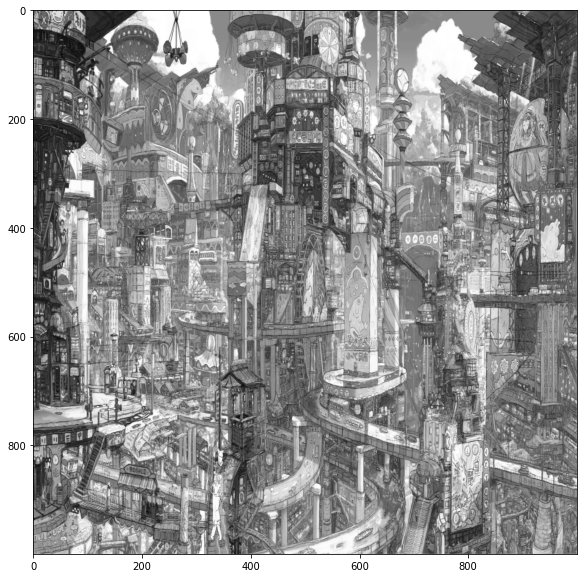

In [74]:
fig = plt.figure(figsize = (10,10))
plt.imshow(attempt, cmap = plt.cm.gray)

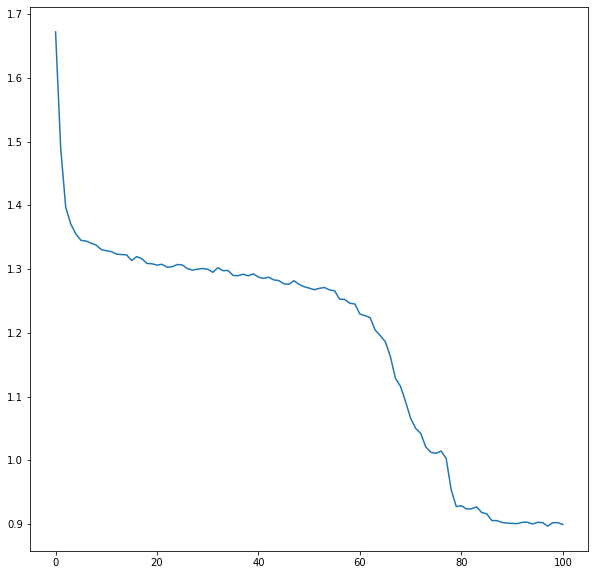

In [75]:
fig = plt.figure(figsize=(10,10))
plt.plot(fitness_history)